In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score

import joblib


In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\parkinsons - parkinsons.csv")

In [3]:
d = data.copy()

In [4]:
d1 = data.copy()

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
d.shape

(195, 24)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
d.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
pd.set_option('display.max_columns', None)
d.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
d.duplicated().sum()

np.int64(0)

### EDA

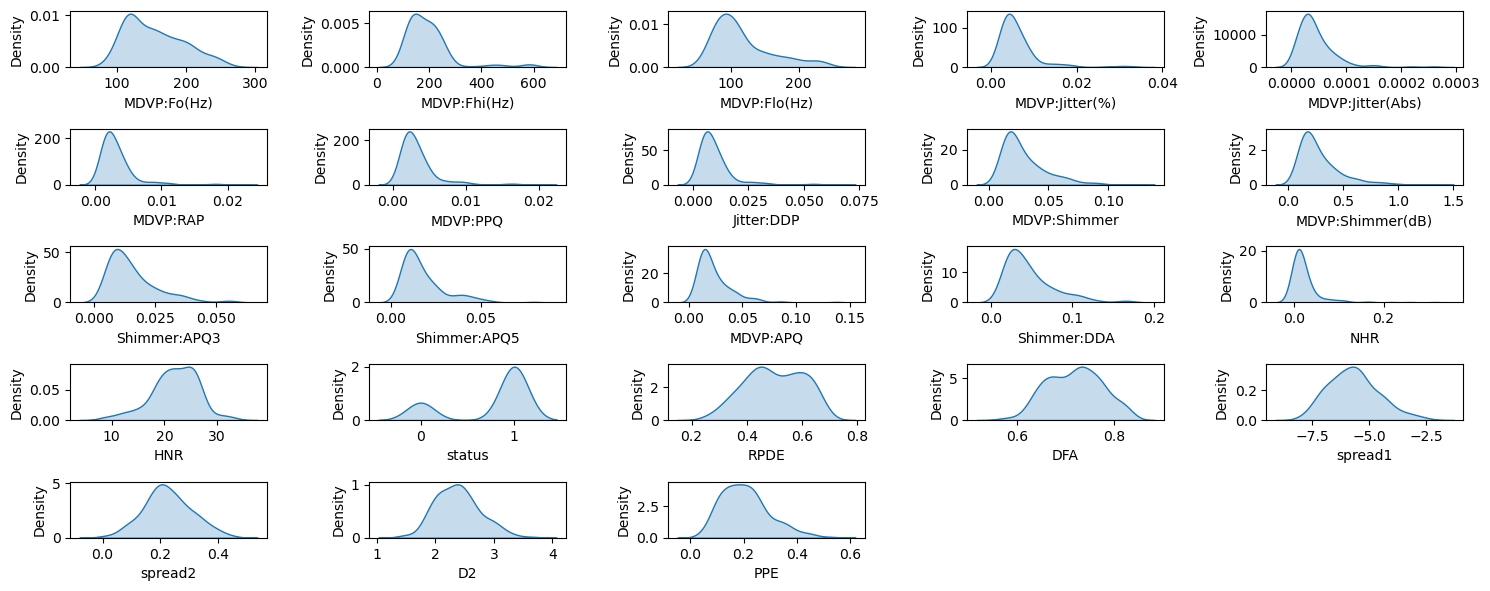

In [11]:
num_col = d.select_dtypes(include = 'number').columns
plt.figure(figsize = (15, 6))

for i, col in enumerate(num_col, 1):
    plt.subplot(len(num_col)//5+1, 5, i)
    sns.kdeplot(d[col], fill = True)
    
plt.tight_layout()    
plt.show()
    

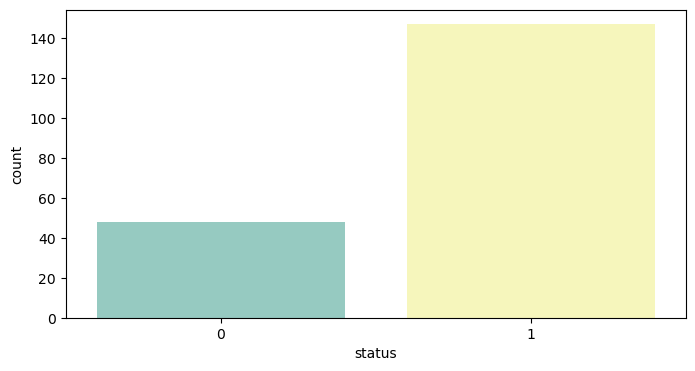

In [12]:
plt.figure(figsize = (8, 4))

sns.countplot(x = 'status', data = d, palette = "Set3")
plt.show()

<Axes: >

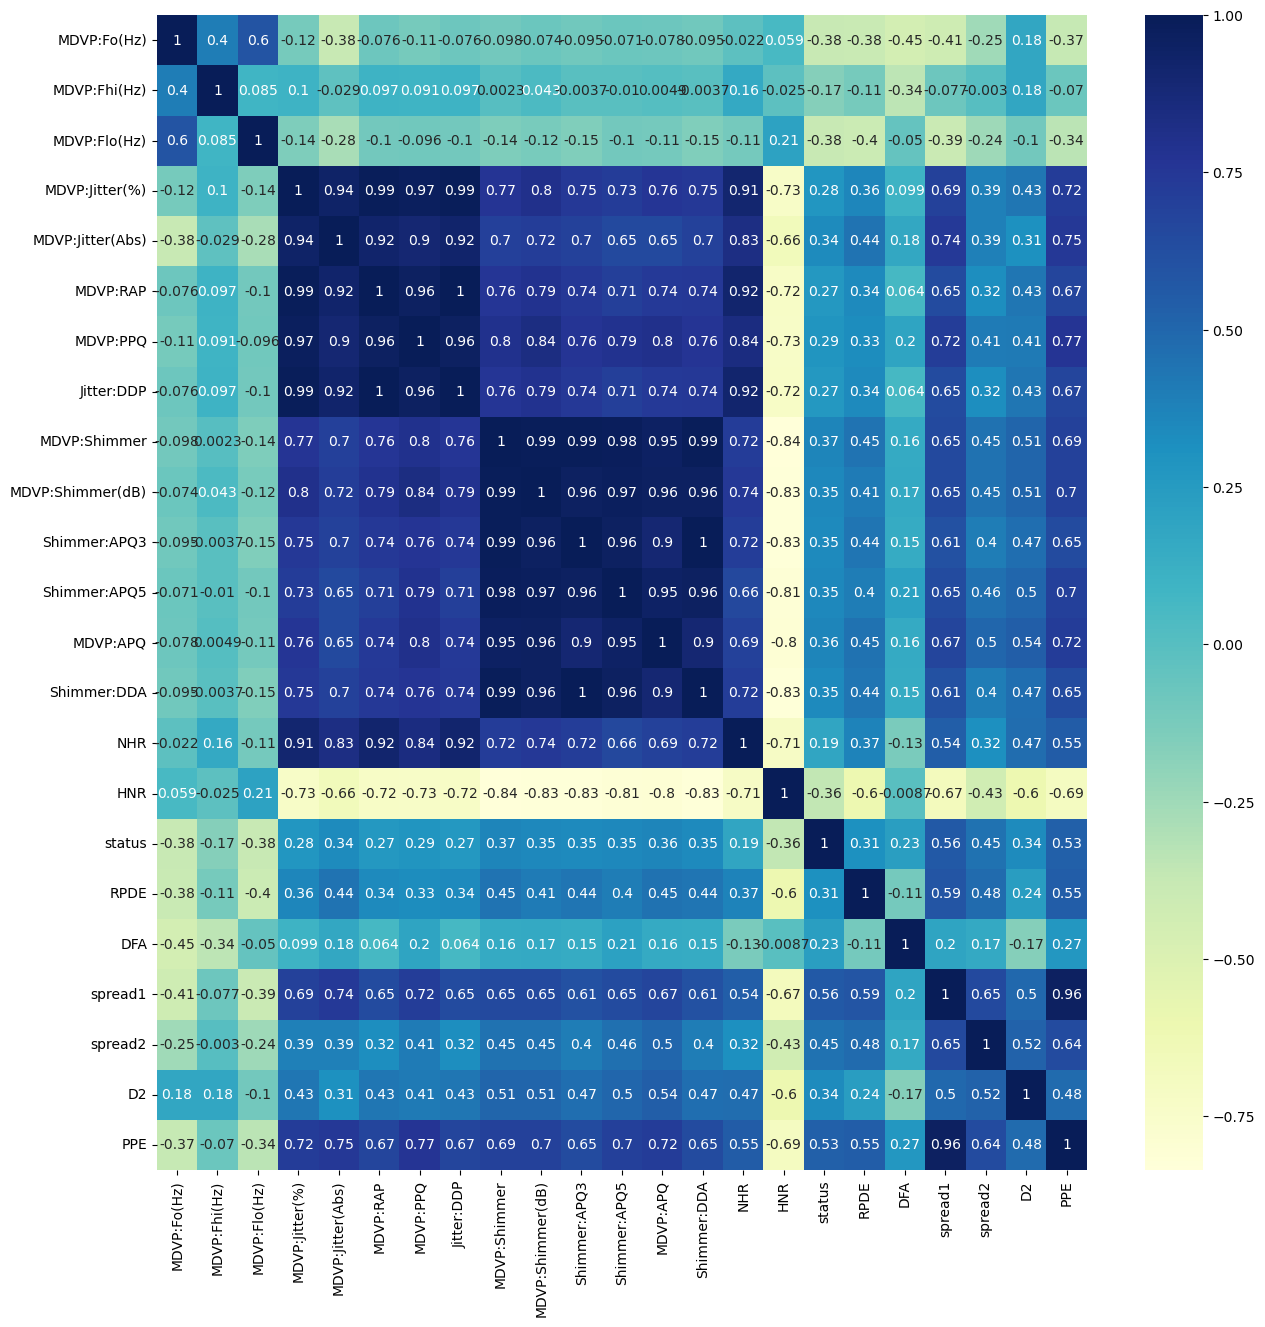

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(d.drop("name", axis = 1).corr(), annot = True, ax = ax, cmap = "YlGnBu")

In [15]:
x = d.drop(['status', 'name'], axis = 1)
y = d['status']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [37]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [38]:
LR = LogisticRegression(random_state = 100, class_weight = 'balanced')
LR.fit(x_train_scaled, y_train)

LR_y_prediction = LR.predict(x_test_scaled)
LR_y_prob = LR.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, LR_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, LR_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train, LR.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, LR_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.90      0.97      0.94        38

    accuracy                           0.90        49
   macro avg       0.89      0.81      0.84        49
weighted avg       0.90      0.90      0.89        49

ROC-AUC: 0.91
Training Accuracy :  0.82
Test Accuracy :  0.9


In [32]:
LR_y_proba   = LR.predict_proba(x_test_scaled)[:, 1]
LR_y_pred_th = (LR_y_proba >= 0.5).astype(int)
print(classification_report(y_test, LR_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, LR_y_proba))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59

ROC-AUC: 0.9015151515151515


In [20]:
RFC = RandomForestClassifier(random_state =42)
RFC.fit(x_train_scaled, y_train)

RFC_y_prediction = RFC.predict(x_test_scaled)
RFC_y_prob = RFC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, RFC_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, RFC_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train, RFC.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, RFC_y_prediction), 2))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.93      1.00      0.96        38

    accuracy                           0.94        49
   macro avg       0.96      0.86      0.90        49
weighted avg       0.94      0.94      0.94        49

ROC-AUC: 0.94
Training Accuracy :  1.0
Test Accuracy :  0.94


In [21]:
RFC_y_proba   = RFC.predict_proba(x_test_scaled)[:, 1]
RFC_y_pred_th = (RFC_y_proba >= 0.6).astype(int)
print(classification_report(y_test, RFC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, RFC_y_proba))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.93      0.97      0.95        38

    accuracy                           0.92        49
   macro avg       0.91      0.85      0.87        49
weighted avg       0.92      0.92      0.92        49

ROC-AUC: 0.9389952153110047


In [22]:
DT = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced', criterion = 'entropy')
DT.fit(x_train_scaled, y_train)

DT_y_prediction = DT.predict(x_test_scaled)
DT_y_proba = DT.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, DT_y_prediction))
print("ROC_AUC : ", round(roc_auc_score(y_test, DT_y_proba),2))

print("Training Accuracy : ", round(accuracy_score(y_train, DT.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, DT_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.90      0.95      0.92        38

    accuracy                           0.88        49
   macro avg       0.84      0.79      0.81        49
weighted avg       0.87      0.88      0.87        49

ROC_AUC :  0.79
Training Accuracy :  1.0
Test Accuracy :  0.88


In [23]:
DT_y_proba   = DT.predict_proba(x_test_scaled)[:, 1]
DT_y_pred_th = (DT_y_proba >= 0.5).astype(int)


print(classification_report(y_test, DT_y_pred_th))
print("ROC-AUC:", round(roc_auc_score(y_test, DT_y_proba),2))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.90      0.95      0.92        38

    accuracy                           0.88        49
   macro avg       0.84      0.79      0.81        49
weighted avg       0.87      0.88      0.87        49

ROC-AUC: 0.79


In [24]:
GBC = GradientBoostingClassifier(random_state = 0, n_estimators = 50, learning_rate = 0.5)
GBC.fit(x_train_scaled, y_train)

GBC_y_prediction = GBC.predict(x_test_scaled)
GBC_y_proba = GBC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, GBC_y_prediction))
print("ROC_AUC : ", round(roc_auc_score(y_test, GBC_y_proba),2))

print("Training Accuracy : ", round(accuracy_score(y_train, GBC.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, GBC_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.90      0.97      0.94        38

    accuracy                           0.90        49
   macro avg       0.89      0.81      0.84        49
weighted avg       0.90      0.90      0.89        49

ROC_AUC :  0.96
Training Accuracy :  1.0
Test Accuracy :  0.9


In [63]:
XGBC = XGBClassifier(random_state = 100, n_estimators = 300, learning_rate = 0.7, max_depth = 3)
XGBC.fit(x_train_scaled, y_train)

XGBC_y_prediction = XGBC.predict(x_test_scaled)
XGBC_y_proba = XGBC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, XGBC_y_prediction))
print("ROC_AUC : ", round(roc_auc_score(y_test, XGBC_y_proba),2))

print("Training Accuracy : ", round(accuracy_score(y_train, XGBC.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, XGBC_y_prediction), 2))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.93      1.00      0.96        38

    accuracy                           0.94        49
   macro avg       0.96      0.86      0.90        49
weighted avg       0.94      0.94      0.94        49

ROC_AUC :  0.96
Training Accuracy :  1.0
Test Accuracy :  0.94


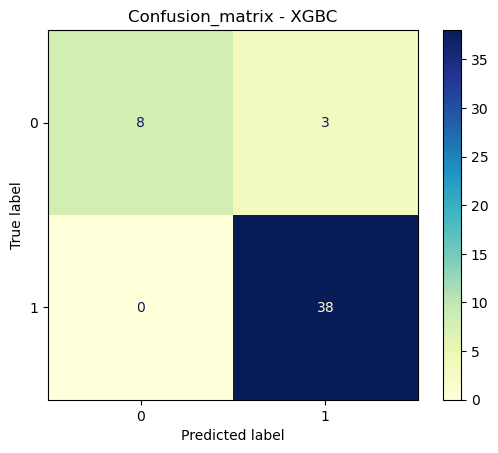

In [64]:
cm = confusion_matrix(y_test, XGBC_y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = XGBC.classes_)
disp.plot(cmap = "YlGnBu")
plt.title("Confusion_matrix - XGBC")
plt.show()

In [65]:
joblib.dump(XGBC, "models/Parkinson/XGBC_Parkinson.pkl")
joblib.dump(ss, "models/Parkinson/XGBC_Parkinson_scaler.pkl")
joblib.dump(x_train.columns.tolist(), "Models/Parkinson/XGBC_feature_names_Parkinson.pkl")

['Models/Parkinson/XGBC_feature_names_Parkinson.pkl']

In [66]:
x.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [67]:
d['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64